In [1]:
from memberships import Membership, GaussianMembership, TrapizoidalMembership, TriangleMembership
import fis
import numpy as np
%pip install matplotlib
%matplotlib inline
import matplotlib.pyplot
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\Conno\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
service_max = 10
service_min = 0
food_max = 10
food_min = 0
tip_max = 70
tip_min = 20

#Do the tipping problem
low_service = TriangleMembership(service_min, service_max,[0, 0, 5])
mid_service = GaussianMembership(service_min, service_max, 5, 0.5, x_step=0.01)
high_service = TrapizoidalMembership(service_min, service_max, [6,7.5,10,10], x_step=0.5)

bad_food = TrapizoidalMembership(food_min, food_max,[0, 0, 2,3])
mid_food = GaussianMembership(food_min, food_max, 4, 1.2, x_step=0.01)
good_food = TrapizoidalMembership(food_min, food_max, [6,7.5,10,10], x_step=0.5)

low_tip = TrapizoidalMembership(tip_min, tip_max, [20,20, 30, 40])
okay_tip = TrapizoidalMembership(tip_min, tip_max, [30,45, 50, 60])
high_tip = TrapizoidalMembership(tip_min, tip_max, [55,80, 100, 40])

#Rules to follow
low_tip_rule = fis.Rule([low_service, bad_food], low_tip)
okay_tip_rule = fis.Rule([mid_service, mid_food], okay_tip)
high_tip_rule = fis.Rule([high_service, bad_food], high_tip)



[0.2, 0.1353352832366127]
27.77518493835419


39.58131830821969
35.80292957470486
37.74863826313345
37.36692410241591


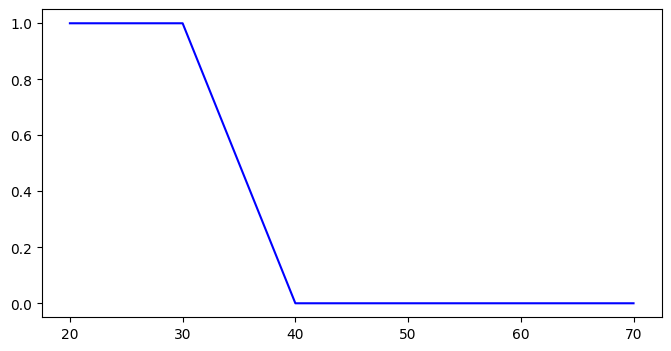

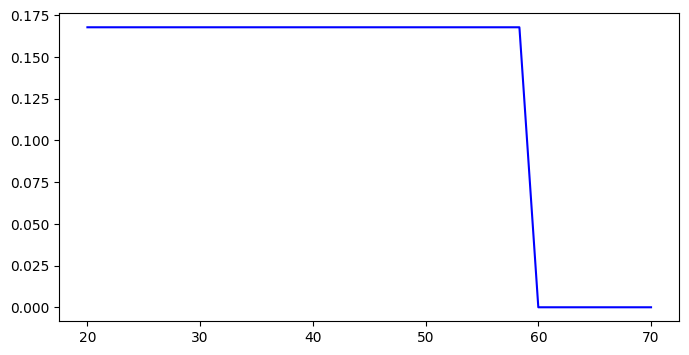

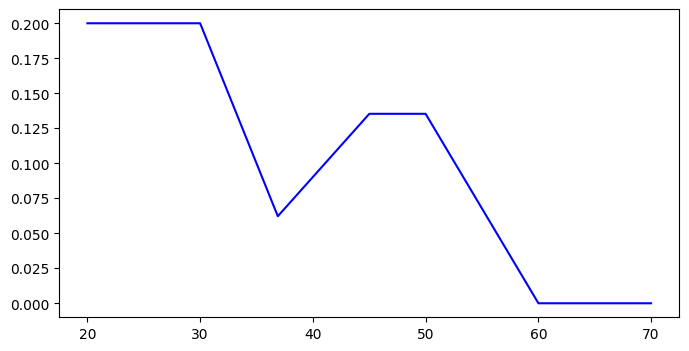

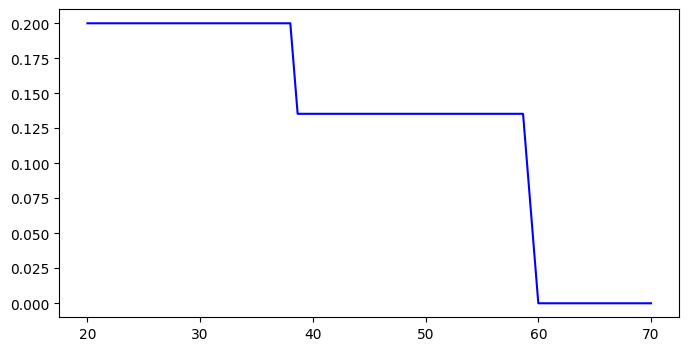

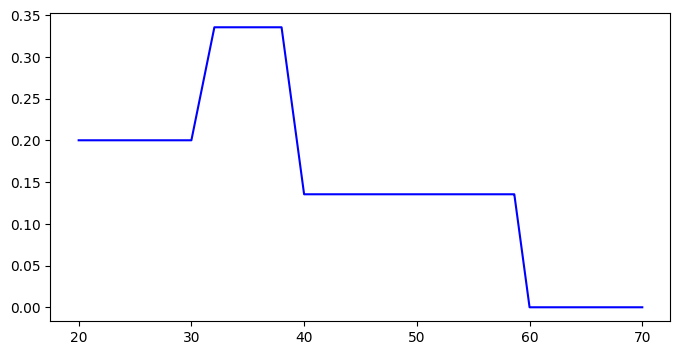

In [3]:
food = 2.5
service = 4

min_memberships = [low_tip_rule.evaluate([service, food]), okay_tip_rule.evaluate([service, food])]
print(min_memberships)

for op in ["max_min", "averaging", "root_sum_square", "center_of_mass", "sum"]:
    mem, min = fis.Rule.defuzzify([low_tip_rule, okay_tip_rule], min_memberships, aggregation_op=op)
    print(min)
    mem.graph()

In [4]:
import zadeh_fis as z
A_mem = Membership(0,3,init_membership=False)
A = [1.0, 0.8, 0.0, 0.0]
A_mem.membership = A

B_mem = Membership(0,4,init_membership=False)
B = [0.0, 0.5, 1.0, 0.5, 0.0]
B_mem.membership = B



In [5]:
for imp in [z.corr_min, z.corr_product, z.lukasiewicz, z.classical]:
    rule = z.RuleGenerator([A_mem], B_mem, impliction=imp)
    print(rule.R_matrix)



[[0.  0.5 1.  0.5 0. ]
 [0.  0.5 0.8 0.5 0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
[[0.  0.5 1.  0.5 0. ]
 [0.  0.4 0.8 0.4 0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]
[[0.  0.5 1.  0.5 0. ]
 [0.2 0.7 1.  0.7 0.2]
 [1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1. ]]
[[0.  0.5 1.  0.5 0. ]
 [0.2 0.5 1.  0.5 0.2]
 [1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1. ]]


In [6]:
A1_mem = Membership(0,3,init_membership=False)
A1 = [0.9, 0.7, 0.0, 0.1]
A1_mem.membership = A1
A2_mem = Membership(0,3,init_membership=False)
A2 = [0.1, 0.0, 0.8, 0.9]
A2_mem.membership = A2
rule = z.RuleGenerator([A_mem], B_mem)

for Ap in [A1_mem, A2_mem]:
    Bp = rule.evaluate([Ap])
    print(Bp.membership)

[0.  0.5 0.9 0.5 0. ]
[0.  0.1 0.1 0.1 0. ]


In [7]:
A_3 = Membership(0,1)
A_3.membership = [0,1]
A_3p = Membership(0,1)
A_3p.membership = [0.1,0.8]
rule = z.RuleGenerator([A_mem, A1_mem, A_3], B_mem)
print(rule.evaluate([A1_mem, A1_mem, A_3p]).membership)

[0.  0.5 0.8 0.5 0. ]
